In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [6]:
data=pd.read_csv("D:\Personel\DataScience\Dataset\Chennai_rainfall.csv")
data.head()


,Year,Year_mon,Month,X2,Rain,IOD,QBO
0,2000,1,January,2000.1,0.0,-0.297101,4.85
1,2000,2,February,2000.2,213.0,-0.120937,4.20
2,2000,3,March,2000.3,19.0,0.149103,5.51
3,2000,4,April,2000.4,1.0,0.322335,3.98
4,2000,5,May,2000.5,22.0,0.470297,-0.99


In [7]:
data['Year_month'] = data['Year'].map(str) + "-" + data['Year_mon'].map(str)

In [8]:
columns=['Year', 'Year_mon', 'Month', 'X2', 'IOD', 'QBO']

In [9]:
rain = data.drop(columns, axis=1)

In [10]:
rain.head()

,Rain,Year_month
0,0.0,2000-1
1,213.0,2000-2
2,19.0,2000-3
3,1.0,2000-4
4,22.0,2000-5


In [11]:
rain.isnull().sum()

Rain          0
Year_month    0
dtype: int64

In [12]:
rain = rain.groupby('Year_month')['Rain'].sum().reset_index()

In [13]:
rain = rain.set_index('Year_month')
rain.index

Index(['2000-1', '2000-10', '2000-11', '2000-12', '2000-2', '2000-3', '2000-4',
       '2000-5', '2000-6', '2000-7',
       ...
       '2016-7', '2016-8', '2016-9', '2017-1', '2017-2', '2017-3', '2017-4',
       '2017-5', '2017-6', '2017-7'],
      dtype='object', name='Year_month', length=211)

In [14]:
rain['2017':]

,Rain
Year_month,
2017-1,4.7
2017-2,0.0
2017-3,0.0
2017-4,0.0
2017-5,3.0
2017-6,41.5
2017-7,125.0


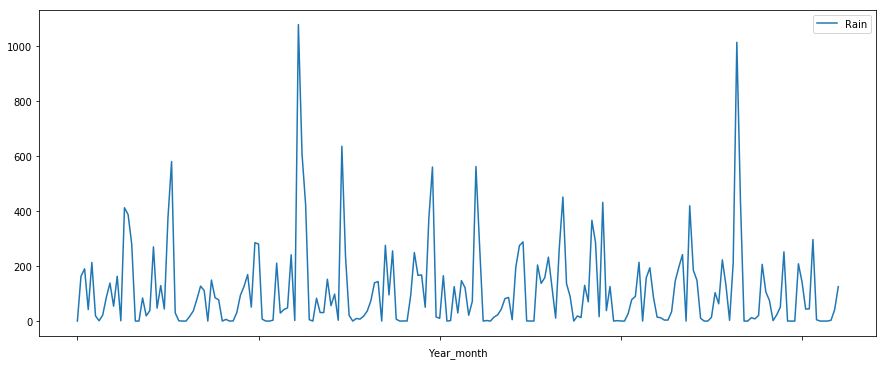

In [15]:
#plt.plot(rain)
rain.plot(figsize=(15,6))
plt.show()

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

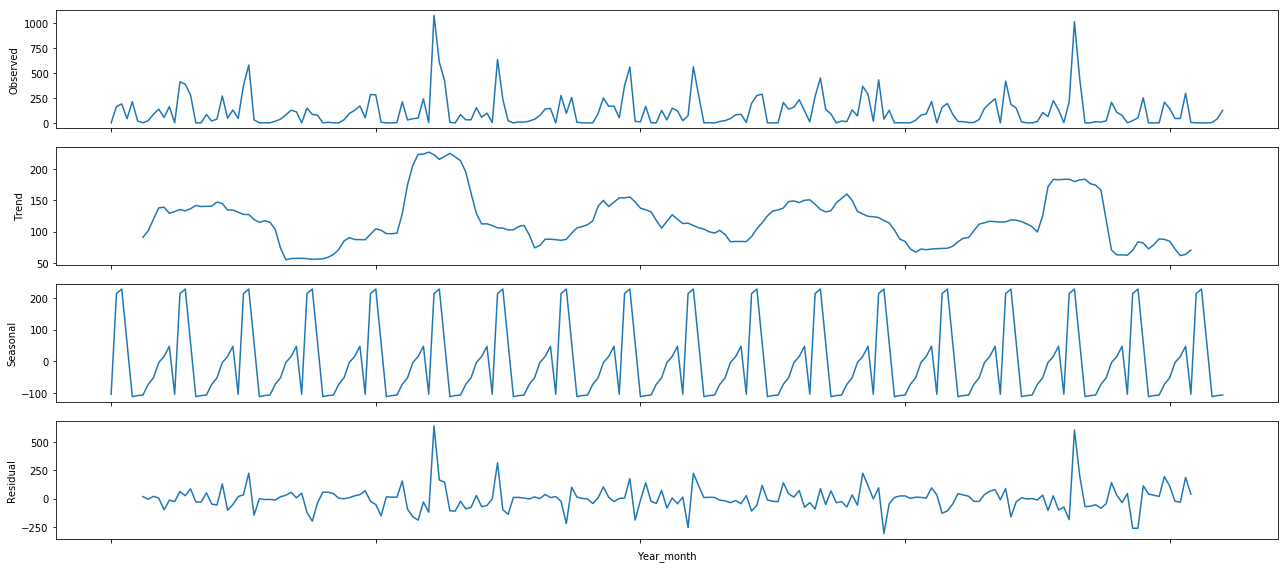

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(rain, freq=12)
fig=decompose.plot()
plt.show()

adfuller(ts,autolag='AIC')

# ARIMA

ARIMA Modelling
 -Aim is to describe the auto correlation of data
 -Assumption of ARIMA is timeseries is stationary
 
Stationary means -> mean, variance, autocorrelation values of TS are fixed in timeline

How to make timeseries stationary:
a.If a TS has trend, make it stationary by removing the trend
b.If variance is not constant, apply log transformation
c.Differencing can help stabilize the mean
d.If data is seasonal, do seasonal differencing 
 (i.e.difference b/w an observation & corresponding observation in previous season)

In [18]:
import itertools as it

In [27]:
p = d= q = range(0,2)
pdq = list(it.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(it.product(p,d,q))]
print('pdq', pdq)
print('seasonal_pdq', seasonal_pdq)
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


pdq [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
seasonal_pdq [(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:            
            mod = sm.tsa.statespace.SARIMAX(rain, order=param, seasonal_order=param_seasonal)
            print('mode')
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        #except:
        #    continue

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


mode
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2831.824506639375
mode
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2773.414176652891
mode
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2620.821429800741
mode
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2525.3975904369254
mode
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2734.8355161204595
mode
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2682.5171087967074
mode
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2589.5164576027187
mode
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2527.266937952713
mode
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2785.1688100193364
mode
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2751.073199535383
mode
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2617.4490494579877
mode
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2520.0134604249024
mode
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2722.7780849993032
mode
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2674.1857626736023
mode
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2578.2920370397196
mode
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2521.9311681737863
mode
ARIMA(0, 1, 0)x(0, 0, 0,

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2725.060836224509
mode
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2618.162123141532
mode
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2521.4402950400977
mode
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2713.574896183227
mode
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2674.725757579845
mode
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2578.6310443577913
mode
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2523.344070275669
mode
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2791.2375529919573
mode
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2768.5396198961475
mode
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2666.016431044902
mode
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2572.4703494936507
mode
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2754.208211906415
mode
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2722.971050991452
mode
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2623.973234496757
mode
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2574.4095814775765
mode
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2724.5522454310903
mode
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 -

In [25]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20)

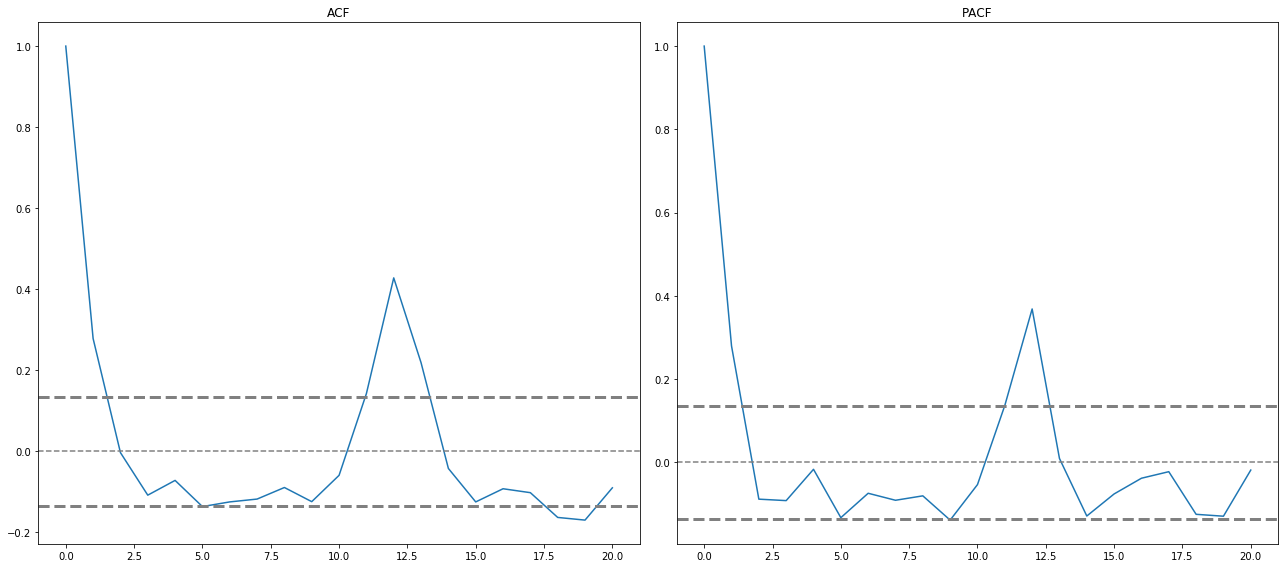

In [26]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', linewidth=3, color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', linewidth=3, color='gray')
plt.title('ACF')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--',linewidth=3, color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', linewidth=3, color='gray')
plt.title('PACF')
plt.tight_layout()

C:\Users\neelredd.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


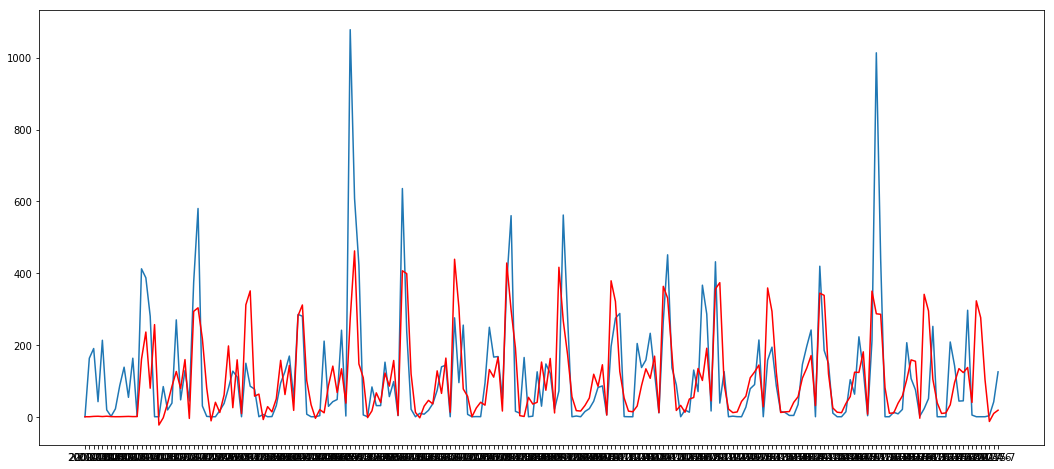

In [33]:
model2 = sm.tsa.statespace.SARIMAX(rain, order=(1, 0, 0), seasonal_order=(0, 1, 1, 12), enforce_stationarity=True)
sarout = model2.fit(disp=-1)
plt.plot(rain)
plt.plot(sarout.fittedvalues, color='red')

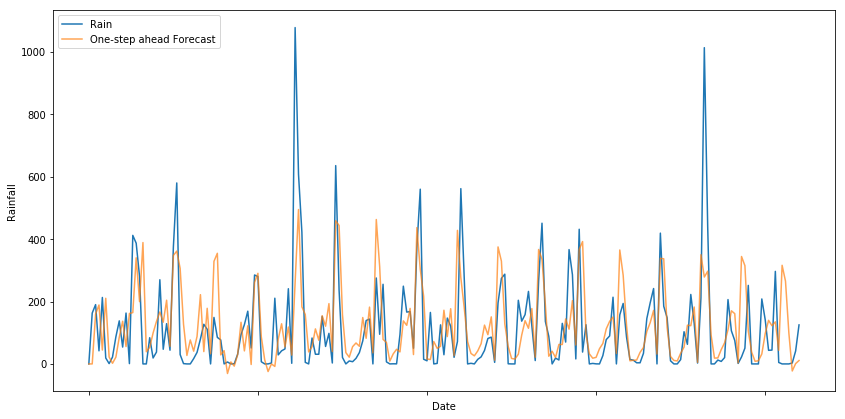

In [49]:
pred = results.get_prediction() # need to mention start and end dates
ax=rain.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()